In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('drug_data.csv')

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

drug_name               0
manufacturer            0
approval_year           0
drug_class              0
indications             0
side_effects            0
dosage_mg               0
administration_route    0
contraindications       0
warnings                0
price_usd               0
batch_number            0
expiry_date             0
side_effect_severity    0
approval_status         0
dtype: int64

Binary clssifications of approval status

In [5]:
df['approval_status'].value_counts(normalize=True)*100

approval_status
Pending     34.540390
Rejected    33.286908
Approved    32.172702
Name: proportion, dtype: float64

how many drugs got approval in x year?

<Axes: xlabel='approval_year'>

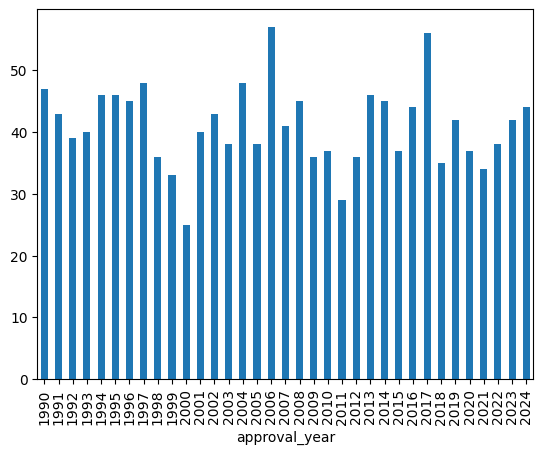

In [6]:
df['approval_year'].value_counts().sort_index().plot(kind='bar')

Which manufacturers have made more drugs?

<Axes: ylabel='manufacturer'>

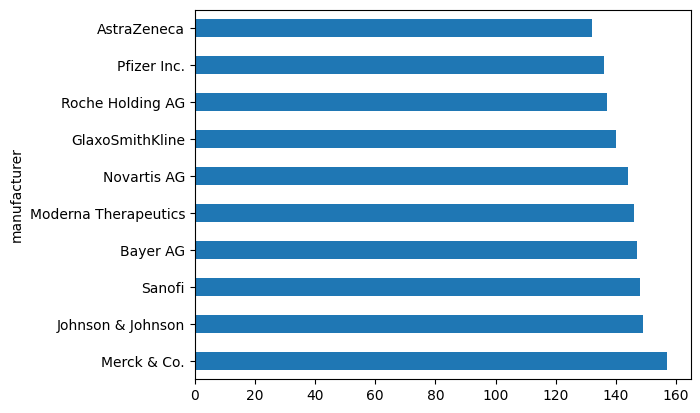

In [7]:
df['manufacturer'].value_counts().plot(kind='barh')


increase in dosage increases severity?

<Axes: xlabel='side_effect_severity', ylabel='dosage_mg'>

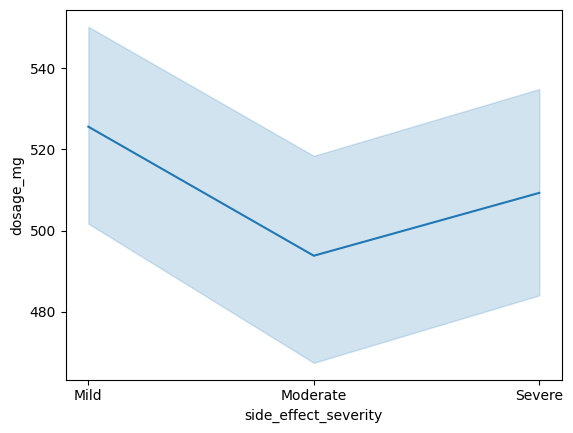

In [8]:
import seaborn as sns
sns.lineplot(x='side_effect_severity', y='dosage_mg', data=df)

which drug classes are relatively safer?


<Axes: xlabel='drug_class'>

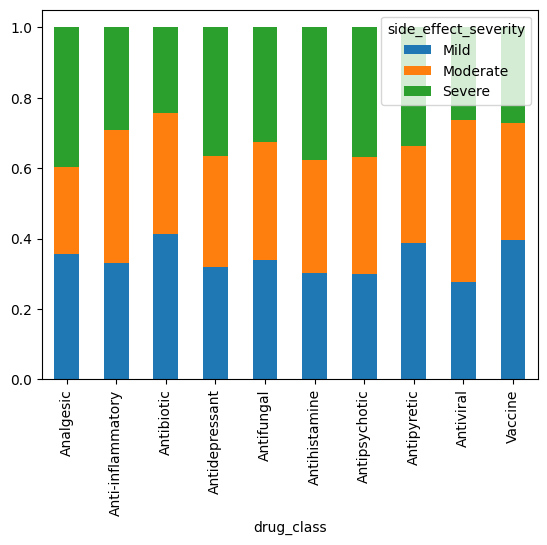

In [9]:
df.groupby('drug_class')['side_effect_severity'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

what is general price of drugs?

<Axes: xlabel='price_usd', ylabel='Count'>

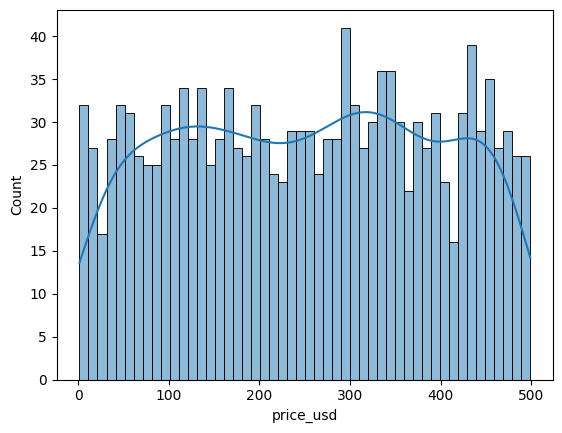

In [10]:
sns.histplot(df['price_usd'], bins=50, kde=True)

drugs with high num side effect can be flagged.

<Axes: xlabel='num_side_effects', ylabel='Count'>

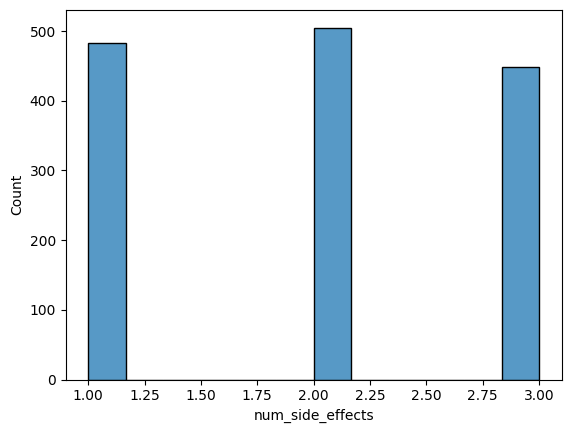

In [11]:
df['num_side_effects'] = df['side_effects'].astype(str).apply(lambda x: len(x.split(',')))
sns.histplot(df['num_side_effects'])

helps in inventory 

In [12]:
df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')
df['days_to_expiry'] = (df['expiry_date'] - pd.to_datetime("today")).dt.days

helps in ranking


In [13]:
df['risk_score'] = df['num_side_effects'] * df['side_effect_severity'].map({'Mild':1, 'Moderate':2, 'Severe':3})

helps to prefer safer routes

<Axes: xlabel='administration_route', ylabel='count'>

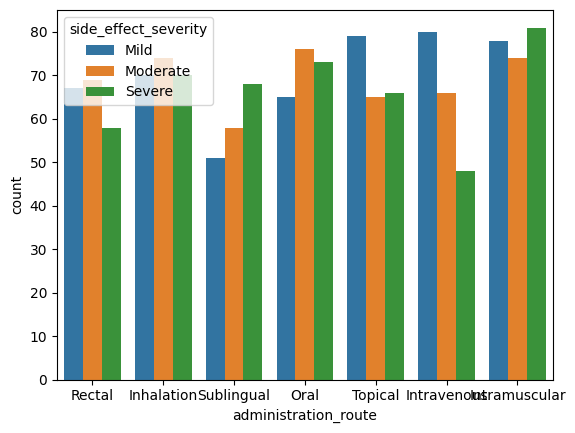

In [14]:
sns.countplot(data=df, x='administration_route', hue='side_effect_severity')

longer indications are more expensive?

<Axes: xlabel='indication_length', ylabel='price_usd'>

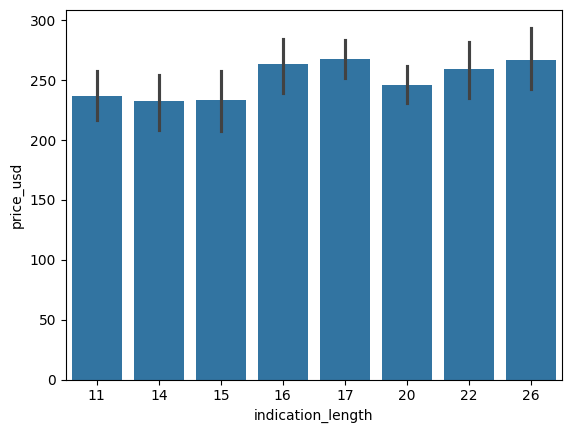

In [15]:
df['indication_length'] = df['indications'].astype(str).apply(len)
sns.barplot(data=df, x='indication_length', y='price_usd')

Short lifespan drugs are riskier in production and ROI

<Axes: xlabel='approval_to_expiry_years', ylabel='Count'>

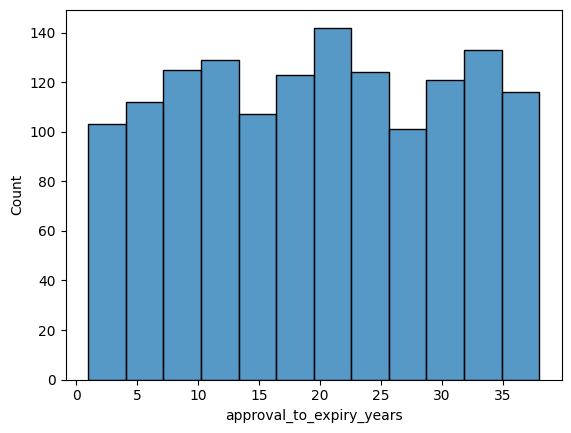

In [16]:
df['expiry_year'] = pd.DatetimeIndex(df['expiry_date']).year
df['approval_to_expiry_years'] = df['expiry_year'] - df['approval_year']
sns.histplot(df['approval_to_expiry_years'])

Are high-risk drugs overpriced?

<Axes: xlabel='risk_score', ylabel='price_usd'>

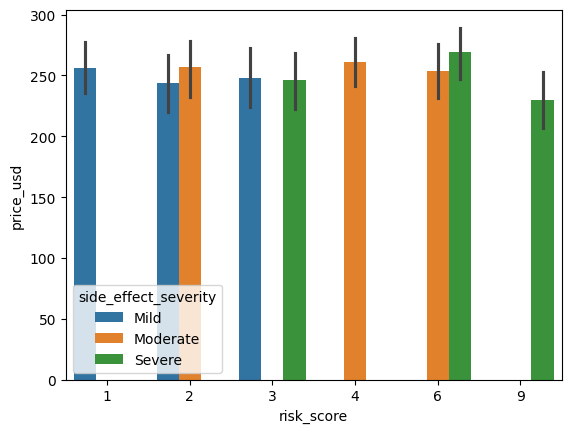

In [25]:
sns.barplot(data=df, x='risk_score', y='price_usd', hue='side_effect_severity')

Sensitive patient groups 

In [18]:
df['has_pregnancy_warning'] = df['warnings'].astype(str).apply(lambda x: int("pregnancy" in x.lower()))
df['has_pregnancy_warning'].sum()

0

In [19]:
df['has_heart_warning'] = df['warnings'].astype(str).apply(lambda x: int("heart" in x.lower()))
df['has_heart_warning'].sum()

0

which manufacturer is creating high risk drugs?

<Axes: xlabel='manufacturer'>

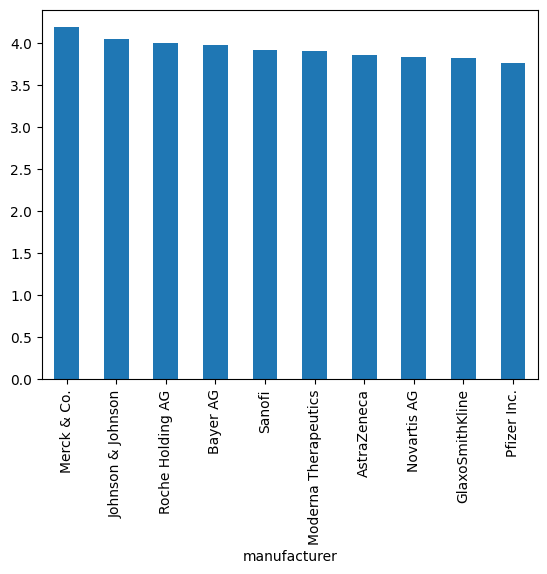

In [21]:
df.groupby('manufacturer')['risk_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

High-price + high-risk = bad deal drugs

<Axes: xlabel='price_per_severity', ylabel='Count'>

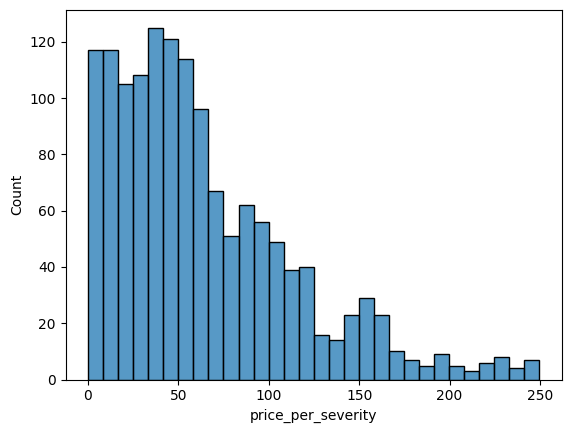

In [23]:
df['price_per_severity'] = df['price_usd'] / (df['risk_score'] + 1)
sns.histplot(df['price_per_severity'], bins=30)